The tutorial of SGM class

In [1]:
import sys
sys.path.append("../mypkg")

In [3]:
from constants import DATA_ROOT, FIG_ROOT
from spectrome import Brain
from sgm.sgm import SGM

In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from easydict import EasyDict as edict
from tqdm import tqdm

%matplotlib inline
plt.style.use(FIG_ROOT/"base.mplstyle")

In [5]:
%load_ext autoreload
%autoreload 2
# 0,1, 2, 3, be careful about the space

# Load data and params

In [6]:
# Load the Connectome
brain = Brain.Brain()
brain.add_connectome(DATA_ROOT)
brain.reorder_connectome(brain.connectome, brain.distance_matrix)
brain.bi_symmetric_c()
brain.reduce_extreme_dir()

# get the sc matrix and dist matrix
C = brain.reducedConnectome
D = brain.distance_matrix;

In [7]:
# the input params
paramv = np.array([0.5, 0.1, 0.1, 0.01, 0.01, 0.10, 10])
names = ["alpha", "gei", "gii", "Taue", "TauG", "Taui", "Speed"]
freqs = np.linspace(2, 45, 50)

params = edict()
for name, v in zip(names, paramv):
    params[name]=v
params

{'alpha': 0.5,
 'gei': 0.1,
 'gii': 0.1,
 'Taue': 0.01,
 'TauG': 0.01,
 'Taui': 0.1,
 'Speed': 10.0}

# SGM forward

In [8]:
# init SGM class
sgm = SGM(C=C, D=D, freqs=freqs, verbose=3);

2024-02-16 14:56:56,618 - sgm.sgm - INFO - Num of ROI is 86.
2024-02-16 14:56:56,620 - sgm.sgm - DEBUG - Be careful about your input, freq should be in Hz!
2024-02-16 14:56:56,621 - sgm.sgm - DEBUG - All tau's params should be in second!
2024-02-16 14:56:56,621 - sgm.sgm - DEBUG - The output  PSD is be in abs magnitude (20log10(psd) toi dB)!


Text(0, 0.5, 'PSD (dB)')

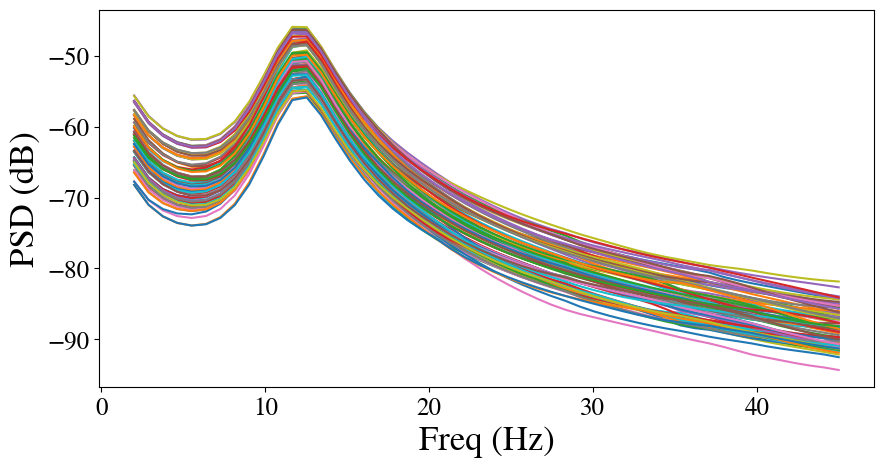

In [9]:
# forward SGM to get psd
psd = sgm.forward_psd(params);
psd_dB = 20 * np.log10(psd);
for roi_ix in range(psd_dB.shape[0]):
    plt.plot(sgm.freqs, psd_dB[roi_ix])
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (dB)")

<AxesSubplot:title={'center':'Modelled PSD'}>

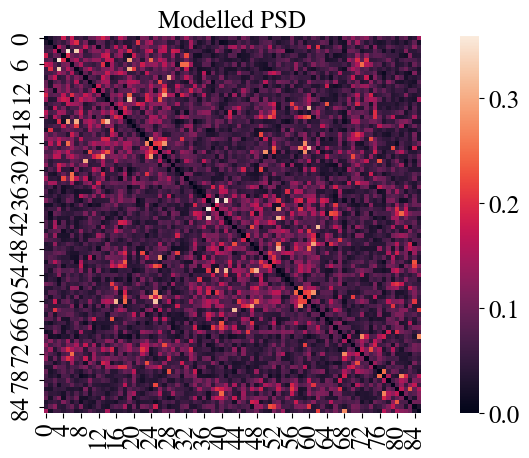

In [10]:
# forward SGM to get FC
fc = sgm.forward_fc(params);
plt.title("Modelled PSD")
sns.heatmap(fc, square=True)